# Deep Learning Bootcamp - Assignment 1 - Beginners: BankNote
## Predict if a note is genuine or not

# Context

Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features.

![alt](<https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/banknotes.png>)
**source: leftover currency**

**Motivation** Despite a decrease in the use of currency due to the recent growth in the use of electronic transactions, cash transactions remain very important in the global market. Banknotes are used to carry out financial activities. To continue with smooth cash transactions, entry of forged banknotes in circulation should be prevented. There has been a drastic increase in the rate of fake notes in the market. Fake money is an imitation of the genuine notes and is created illegally for various motives. These fake notes are created in all denominations which brings the financial market of the country to a low level. The various advancements in the field of scanners and copy machines have led the miscreants to create copies of banknotes. It is difficult for human-eye to recognize a fake note because they are created with great accuracy to look alike a genuine note. Security aspects of banknotes have to be considered and security features are to be introduced to mitigate fake currency. Hence, there is a dire need in banks and ATM machines to implement a system that classifies a note as genuine or fake.

[**Source of Information:** A research paper on Analysis of Banknote Authentication System using Machine Learning Techniques by Sumeet Shahani, Aisa Jagiasi and Priya RL at International Journal of Computer Applications (0975 – 8887) Volume 179 – No.20, February 2018]

# Objective

Being a Data Science, I am committed to use the power of Data Science and come up with an efficient model that accurately predicts if a note is genuine or not.

# Evaluation Criteria

Submissions are evaluated using **Accuracy Score**.

![alt](<https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/accuracy_score.png>)

# About the Data

Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool was used to extract features from images.

# Data Description

|Column Name|Description|
|:----|:----|
|VWTI|Variance of Wavelet Transformed Image|
|SWTI|Skewness of Wavelet Transformed Image|
|CWTI|Curtosis of Wavelet Transformed Image|
|EI|Entropy of Image|
|Class|Class (1: genuine, 0: forged)|

# Acknowledgement

The dataset is downloaded from the UCI Machine Learning Repository.


In [1]:
#importing libraries 
import numpy as np
import pandas as pd

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading train dataset
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [3]:
#reading new unseen test dataset
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [4]:
#getting the overview of all the columns in the dataset
bank_note_data.columns

Index(['VWTI', 'SWTI', 'CWTI', 'EI', 'Class'], dtype='object')

In [5]:
test_data.columns

Index(['VWTI', 'SWTI', 'CWTI', 'EI'], dtype='object')

In [6]:
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [7]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [8]:
bank_note_data.isnull().sum()

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

In [9]:
#checking for duplicates values
bank_note_data.duplicated().sum()

17

In [10]:
#rough checking how many times may each of the 24 values (output above) exists in the dataset
bank_note_data.duplicated(keep=False).sum()

27

In [11]:
#sorting the dataset to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(bank_note_data.columns)
bank_note_data.sort_values(by=cols, inplace=True, ignore_index=True) 

In [12]:
#duplicate records in the dataset
dup = bank_note_data[bank_note_data.duplicated(keep=False)]
dup

,VWTI,SWTI,CWTI,EI,Class
155,-2.6479,10.1374,-1.3310,-5.4707,0
156,-2.6479,10.1374,-1.3310,-5.4707,0
157,-2.6479,10.1374,-1.3310,-5.4707,0
256,-1.8584,7.8860,-1.6643,-1.8384,0
257,-1.8584,7.8860,-1.6643,-1.8384,0
258,-1.8584,7.8860,-1.6643,-1.8384,0
346,-1.3000,10.2678,-2.9530,-5.8638,0
347,-1.3000,10.2678,-2.9530,-5.8638,0
348,-1.3000,10.2678,-2.9530,-5.8638,0
397,-0.7869,9.5663,-3.7867,-7.5034,0


In [13]:
bank_note_data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [14]:
bank_note_data.duplicated().sum()

0

In [15]:
bank_note_data['Class'].value_counts()

0    591
1    488
Name: Class, dtype: int64

In [16]:
round(bank_note_data['Class'].value_counts(normalize = True)* 100, 2)

0    54.77
1    45.23
Name: Class, dtype: float64

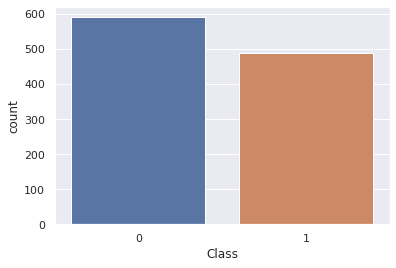

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Class', data=bank_note_data)
plt.show()

In [18]:
#initializing the X (independent variables) and y (dependent variable)
X = bank_note_data.drop('Class', axis = 1)
y = bank_note_data['Class']

In [19]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [20]:
X.shape[1]

4

In [21]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))   

In [22]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [23]:
# printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


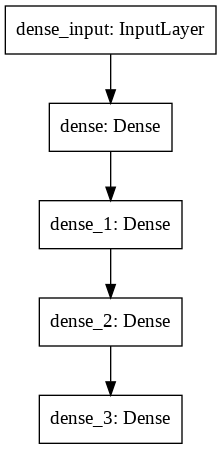

In [24]:
# plotting the model flowchart
from tensorflow.keras.utils import plot_model
plot_model(model)

In [25]:
 model.fit(X, y, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
108/108 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.9268
Epoch 2/200
108/108 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9926
Epoch 3/200
108/108 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9972
Epoch 4/200
108/108 [==============================] - 0s 998us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 5/200
108/108 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/200
108/108 [==============================] - 0s 946us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/200
108/108 [==============================] - 0s 981us/step - loss: 9.4791e-04 - accuracy: 1.0000
Epoch 8/200
108/108 [==============================] - 0s 1ms/step - loss: 5.3763e-04 - accuracy: 1.0000
Epoch 9/200
108/108 [==============================] - 0s 985us/step - loss: 2.6541e-04 - accuracy: 1.0000
Epoch 10/200
108/108 [==============================] - 0s 989us/step -

In [26]:
predictions = model.predict_classes(test_data)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ['Class']

# To download the csv file locally
from google.colab import files
res.to_csv('submissionfileA.csv')         
files.download('submissionfileA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>